In [2]:
import pandas as pd


In [10]:
data = pd.read_csv('data/wine_cleared.zip', sep=',')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
data['price_round'] = data['price'].round().astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int32  
dtypes: float64(1), int32(1), int64(2), o

In [13]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [14]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [15]:
data['country'].value_counts().head()

US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64

In [16]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [17]:
data['is_france'].sum()

22093

In [18]:
data['is_italy'].sum()

19540

In [19]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [20]:
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

In [21]:
import re

In [22]:
regex = '\(.*?\)' # регулярное выражение для вхождения в скобки
data['locality'] = data['title'].str.findall(regex).str.get(0)


In [23]:
data['locality'][2]

'(Willamette Valley)'

In [3]:
country_population = pd.read_csv('data/country_population.zip', sep=';')

In [25]:
country_population.tail()

,country,population
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573
240,Pitcairn Islands,40


In [26]:
country_population.loc[1]['country']

'India'

In [5]:
country_population.loc[country_population['country'] == 'Italy']['population']

24    59,097,904
Name: population, dtype: object

In [27]:
index = country_population.index
for i in index:
    if country_population.loc[i]['country'] == 'Italy':
        print(i)  

24


In [28]:
country_population.iloc[24]['population']

'59,097,904'

In [29]:
country_population.iat[24, 1]

'59,097,904'

In [186]:
country_population['population'].values[24]

'59,097,904'

In [31]:
data = data.join(country_population.set_index('country'), on='country')


In [32]:
country_area = pd.read_csv('data/country_area.zip', sep=';')

In [33]:
data=data.join(country_area.set_index('country'), on='country')

In [34]:
locality_ = data['locality'].tolist()
locality_

['(Etna)',
 '(Douro)',
 '(Willamette Valley)',
 '(Lake Michigan Shore)',
 '(Willamette Valley)',
 '(Navarra)',
 '(Vittoria)',
 '(Alsace)',
 '(Rheinhessen)',
 '(Alsace)',
 '(Napa Valley)',
 '(Alsace)',
 '(Alexander Valley)',
 '(Etna)',
 '(Central Coast)',
 '(Mosel)',
 '(Cafayate)',
 '(Mendoza)',
 '(Ribera del Duero)',
 '(Virginia)',
 '(Virginia)',
 '(Oregon)',
 '(Sicilia)',
 '(Paso Robles)',
 '(Sicilia)',
 '(Sonoma Coast)',
 '(Terre Siciliane)',
 '(Terre Siciliane)',
 '(Cerasuolo di Vittoria)',
 '(Clarksburg)',
 '(Beaujolais-Villages)',
 '(Sicilia)',
 '(Sicilia)',
 '(Dry Creek Valley)',
 '(Sonoma Valley)',
 '(McMinnville)',
 '(Colchagua Valley)',
 '(Sicilia)',
 '(Puglia)',
 '(Sicilia)',
 '(Sicilia)',
 '(Willamette Valley)',
 '(Beaujolais)',
 '(Paso Robles)',
 '(Maule Valley)',
 '(Virginia)',
 '(Sicilia)',
 '(Lake County)',
 '(Monticello)',
 '(Brouilly)',
 '(Sicilia)',
 '(Colchagua Valley)',
 '(Monica di Sardegna)',
 '(Bordeaux Blanc)',
 '(Sicilia)',
 '(Napa Valley)',
 '(North Coast)',
 

In [35]:
res = [x for x in range(len(locality_)) if locality_[x] =='(Columbia Valley (WA)']
res[0]

59

In [36]:
data.iloc[59]['area']

9372610.0

4. Создание признаков. Работа с форматом «дата-время»

In [37]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [38]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Задание 4.1

Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [39]:
calls['time_connection']=(calls['created_at'] - calls['agent_date']).dt.seconds

In [40]:
calls['time_connection'].sum()

89

Задание 4.2

Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [41]:
calls['is_connection']=calls['duration'].apply(lambda x: 1 if x>10 else 0)
### data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
calls['is_connection'].sum()

7

Задание 4.3

Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [42]:
calls['time_diff']=(calls['end_date'] - calls['agent_date']).dt.seconds

In [43]:
calls['time_diff'].sum()

1144

In [44]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [45]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


Задание 4.5
 
Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [47]:
date_report = pd.DataFrame(['2022-01-12']*129970)
date_report=pd.to_datetime(date_report[0])
date_report

0        2022-01-12
1        2022-01-12
2        2022-01-12
3        2022-01-12
4        2022-01-12
            ...    
129965   2022-01-12
129966   2022-01-12
129967   2022-01-12
129968   2022-01-12
129969   2022-01-12
Name: 0, Length: 129970, dtype: datetime64[ns]

In [48]:
data['years_diff']=(date_report[0] - data['year'])

In [49]:
max_year_diff = data['years_diff'].max()
max_year_diff

Timedelta('98627 days 00:00:00')

5. Кодирование признаков. Методы

In [50]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [51]:
import category_encoders as ce

In [52]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [53]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


Задание 5.3 (Самопроверка)

Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [54]:
## data = data.drop(['year'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   Unnamed: 0             129972 non-null  int64          
 1   country                129909 non-null  object         
 2   description            129972 non-null  object         
 3   designation            129972 non-null  object         
 4   points                 129972 non-null  int64          
 5   price                  129972 non-null  float64        
 6   province               129909 non-null  object         
 7   region_1               129972 non-null  object         
 8   taster_name            129972 non-null  object         
 9   taster_twitter_handle  129972 non-null  object         
 10  title                  129972 non-null  object         
 11  variety                129971 non-null  object         
 12  winery                 129972 

In [55]:
year_3 = data[['year']].copy()


In [56]:
year_3.drop(columns=['year'])

""
0
1
2
3
4
...
129966
129967
129968
129969


In [57]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
data_bin = ord_encoder.fit_transform(year_3['year'])
year_3 = pd.concat([year_3, data_bin], axis=1)

year_3

,year,year
0,2013-01-01,1
1,2011-01-01,2
2,2013-01-01,1
3,2013-01-01,1
4,2012-01-01,3
...,...,...
129966,2013-01-01,1
129967,2004-01-01,12
129968,2013-01-01,1
129969,2012-01-01,3


In [58]:
clothing
clothing.drop(columns = ['size', 'type'])

""
0
1
2
3
4
5
6
7
8
9


In [59]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

AttributeError: 'DataFrame' object has no attribute 'unique'

Задание 5.4

В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя изученные ранее способы кодирования.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [60]:
encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0


In [61]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

AttributeError: 'DataFrame' object has no attribute 'unique'

Задание 5.5

Закодируйте признак country двоичным способом.

Сколько новых признаков образовалось после кодирования признака country?

In [62]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_17,taster_name_18,taster_name_19,taster_name_20,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,1


Задание 5.8

На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [63]:
data['taster_twitter_handle'].value_counts()

unknown             31213
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1006
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [64]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1


Задание 5.9 (Самопроверка)

Используйте следующий датафрейм для задания:

In [65]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [66]:
df.head()

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [67]:
df.dtypes

product         object
price            int64
payment_type    object
dtype: object

In [68]:
import category_encoders as ce
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df[['product', 'payment_type']])
df = pd.concat([df, data_bin], axis=1)

df

,product,price,payment_type,product,payment_type
0,Product1,1200,Mastercard,1,1
1,Product2,3600,Visa,2,2
2,Product3,7500,Amex,3,3


# 6. Преобразование признаков. Нормализация. Стандартизация

In [69]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

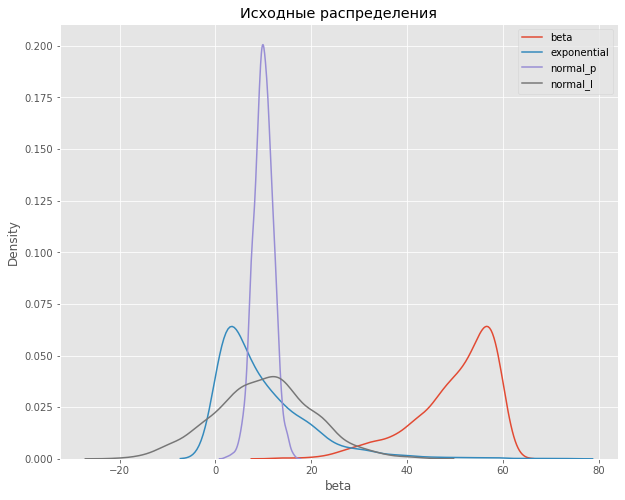

In [70]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [71]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


MINMAXSCALER

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

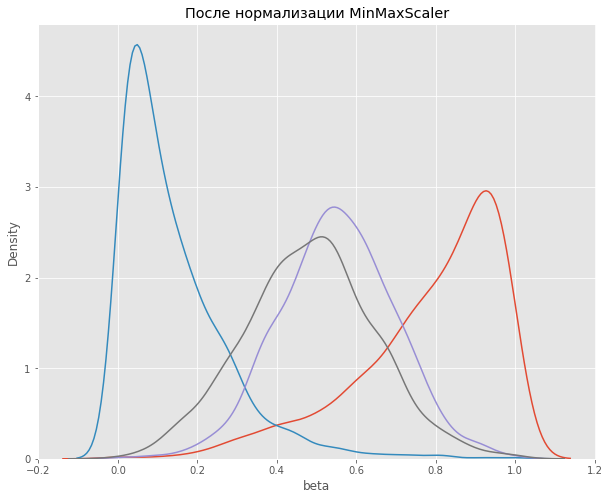

In [72]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

ROBUSTSCALER

<AxesSubplot:title={'center':'Рапсределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

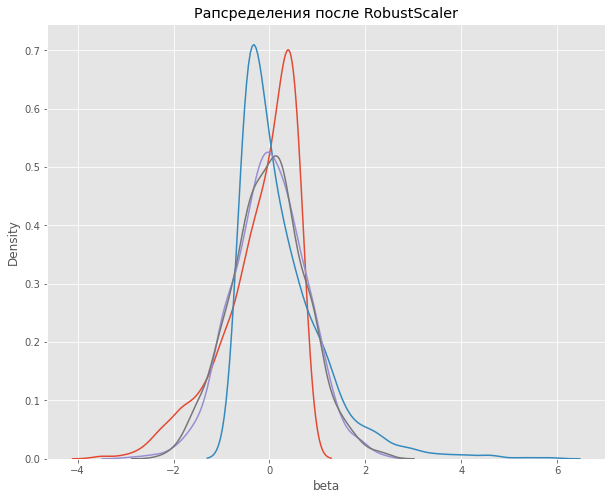

In [73]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Рапсределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

STANDARDSCALER

In [83]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)
df_s

array([[-1.2691996 , -0.79807271,  0.92711013, -0.53743585],
       [ 0.59102294,  0.31659834,  0.89548353,  0.07757507],
       [-0.30572291, -0.69034091,  0.57275704, -0.61952163],
       ...,
       [ 1.04928667, -0.30974409,  0.76887904,  2.32491378],
       [ 0.25517038, -0.78499332,  0.90707409, -0.40443096],
       [-1.07393015, -0.82902586,  0.08780428,  0.31025934]])

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

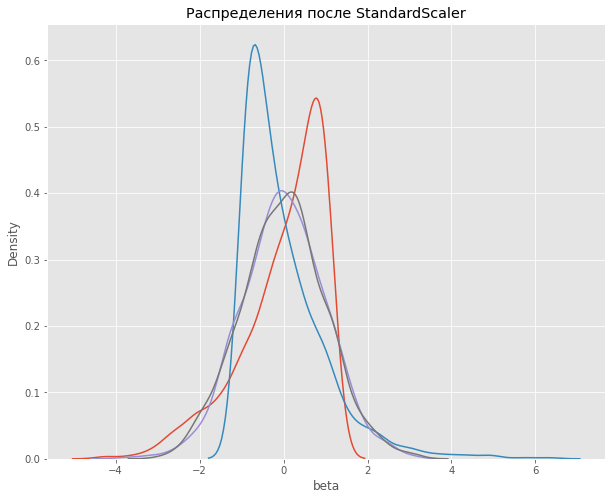

In [84]:

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

Задание 6.4

Нормализуйте признак price. Используйте подходящий тип нормализации.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

In [75]:
data_price = pd.DataFrame(data['price'])

In [76]:
data_price

,price
0,35.363389
1,15.000000
2,14.000000
3,13.000000
4,65.000000
...,...
129966,28.000000
129967,75.000000
129968,30.000000
129969,32.000000


In [85]:
# инициализируем нормализатор RobustScaler
r_scaler_price = preprocessing.RobustScaler()
col_names_= list(data_price.columns)
# копируем исходный датасет
df_r_price = r_scaler_price.fit_transform(data_price)
df_r_price

array([[ 0.33469951],
       [-0.59090909],
       [-0.63636364],
       ...,
       [ 0.09090909],
       [ 0.18181818],
       [-0.31818182]])

<AxesSubplot:title={'center':'Рапсределения после RobustScaler'}, xlabel='price', ylabel='Density'>

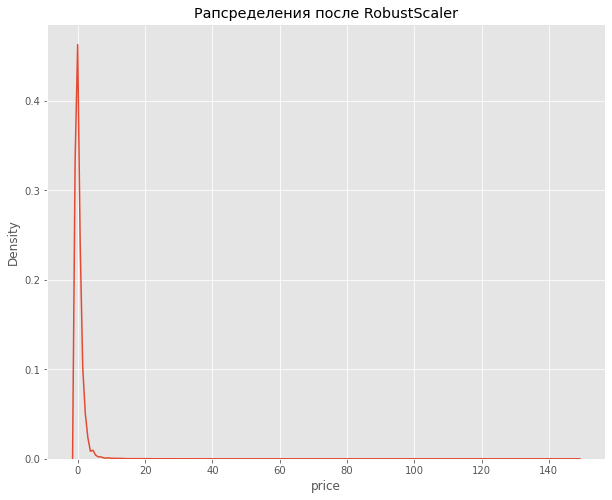

In [86]:

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r_price = pd.DataFrame(df_r_price, columns=col_names_)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Рапсределения после RobustScaler')

sns.kdeplot(df_r_price['price'], ax=ax1)


Задание 6.4

Нормализуйте признак price. Используйте подходящий тип нормализации.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

In [88]:
df_r_price['price'].sum().round()

43501.0

Задание 6.5

Стандартизируйте исходный признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

In [146]:
data_price_s = pd.DataFrame(data['price'])
data_price_s
np.array(data_price_s['price']).reshape(-1,1)

array([[35.36338913],
       [15.        ],
       [14.        ],
       ...,
       [30.        ],
       [32.        ],
       [21.        ]])

In [144]:
col_names= list(data_price_s.columns)
col_names

['price']

In [145]:

s_scaler = preprocessing.StandardScaler()

data_price_s = s_scaler.fit_transform(data_price_s)
data_price_s[129968]

array([1.00151487])

7. Отбор признаков. Мультиколлинеарность

In [147]:
iris = pd.read_csv('data/iris.zip')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

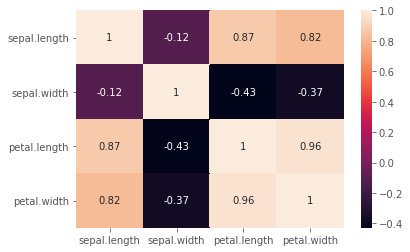

In [148]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [149]:
iris = iris.drop(['petal.width'], axis=1)

In [150]:
iris = iris.drop(['petal.length'], axis=1)

<AxesSubplot:>

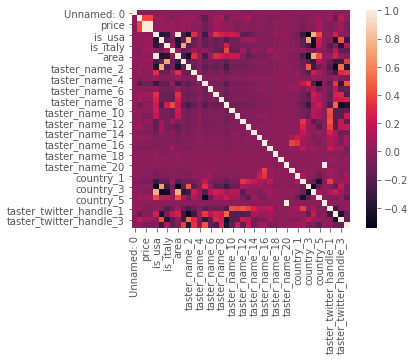

In [151]:
sns.heatmap(data.corr(), square=True)

In [569]:
import pandas as pd
def get_correlated(corr_matrix, thres=0.7):
    """Getting correlated pairs from a correlation matrix 
       with correlation coefficients higher than the threshold
    Args:
        corr_matrix (pandas DataFrame): correlation matrix (e.g., from df.corr())
        thres (float, optional): threshold. Defaults to 0.7 (i.e., coeff > 0.7 or coeff < -0.7).
    Returns:
        pandas Series: correlated pairs and correlation coefficients
    """
    
    correlated_pairs = {}
    
    for col in corr_matrix.columns:
        positive_filter = corr_matrix[col] >= thres
        negative_filter = corr_matrix[col] <= -thres
        match_series = corr_matrix[col][positive_filter | negative_filter]
        for match in match_series.index:
            if match != col and match + ' -- ' + col not in correlated_pairs.keys():
                correlated_pairs.update({col + ' -- ' + match: match_series[match]})
   
    return pd.Series(correlated_pairs).sort_values()
pd.Series(correlated_pairs).sort_values()

NameError: name 'correlated_pairs' is not defined

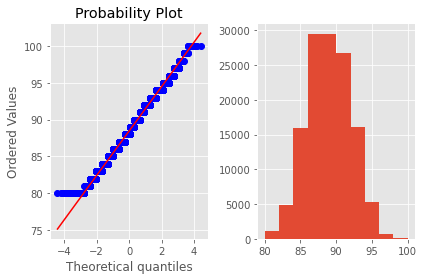

In [548]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [546]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,1,1,0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0


8. Проверка знаний

In [152]:
import pandas as pd
heart = pd.read_csv('data/heart.zip', sep=',')
heart.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [153]:
heart['old']=heart['age'].apply(lambda x: 1 if x > 60 else 0) 

In [154]:
heart['old'].sum()

79

Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы.

In [161]:
heart.iloc[300]['trestbps']

144.0

In [162]:
heart['trestbps'].values[300]

144

Задание 8.5

Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

Сколько признаков получилось в датасете?
ответ 34

In [166]:
encoder = ce.OneHotEncoder(cols=['cp']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, type_bin], axis=1)


In [167]:
encoder = ce.OneHotEncoder(cols=['restecg']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['restecg'])
heart = pd.concat([heart, type_bin], axis=1)

In [168]:
encoder = ce.OneHotEncoder(cols=['slope']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, type_bin], axis=1)

In [169]:
encoder = ce.OneHotEncoder(cols=['ca']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, type_bin], axis=1)

In [170]:
encoder = ce.OneHotEncoder(cols=['thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin], axis=1)

In [171]:
heart.shape

(303, 35)

In [172]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    float64
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

In [173]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


<AxesSubplot:title={'center':'Рапсределения после RobustScaler'}, xlabel='chol', ylabel='Density'>

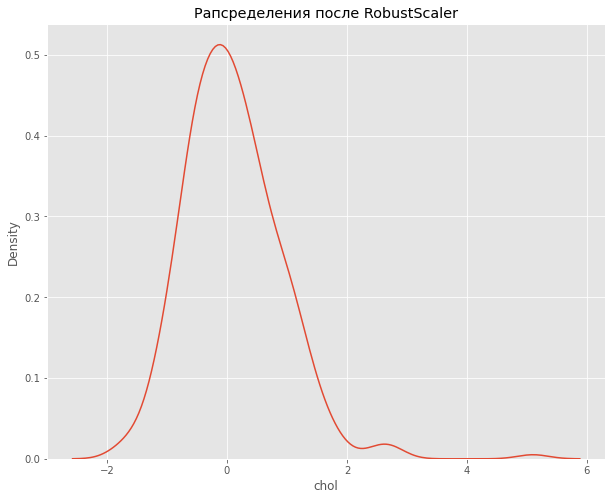

In [598]:
# инициализируем нормализатор RobustScaler
col_names_ = list(heart.columns)

r_scaler = preprocessing.RobustScaler()
# копируем исходный датасет
df_r = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names_)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Рапсределения после RobustScaler')


sns.kdeplot(df_r['chol'], ax=ax1)


In [594]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [599]:
df_r.std()

age          0.672748
sex          0.466011
cp           0.516026
trestbps     0.876907
chol         0.816232
fbs          0.356198
restecg      0.525860
thalach      0.704774
exang        0.469794
oldpeak      0.725672
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
cp_1         0.265288
cp_2         0.453171
cp_3         0.371809
cp_4         0.500038
restecg_1    0.500606
restecg_2    0.500824
restecg_3    0.114325
slope_1      0.254395
slope_2      0.499842
slope_3      0.499382
ca_1         0.494765
ca_2         0.331734
ca_3         0.411169
ca_4         0.248704
ca_5         0.127605
thal_1       0.236774
thal_2       0.498528
thal_3       0.487668
thal_4       0.081110
dtype: float64

<AxesSubplot:>

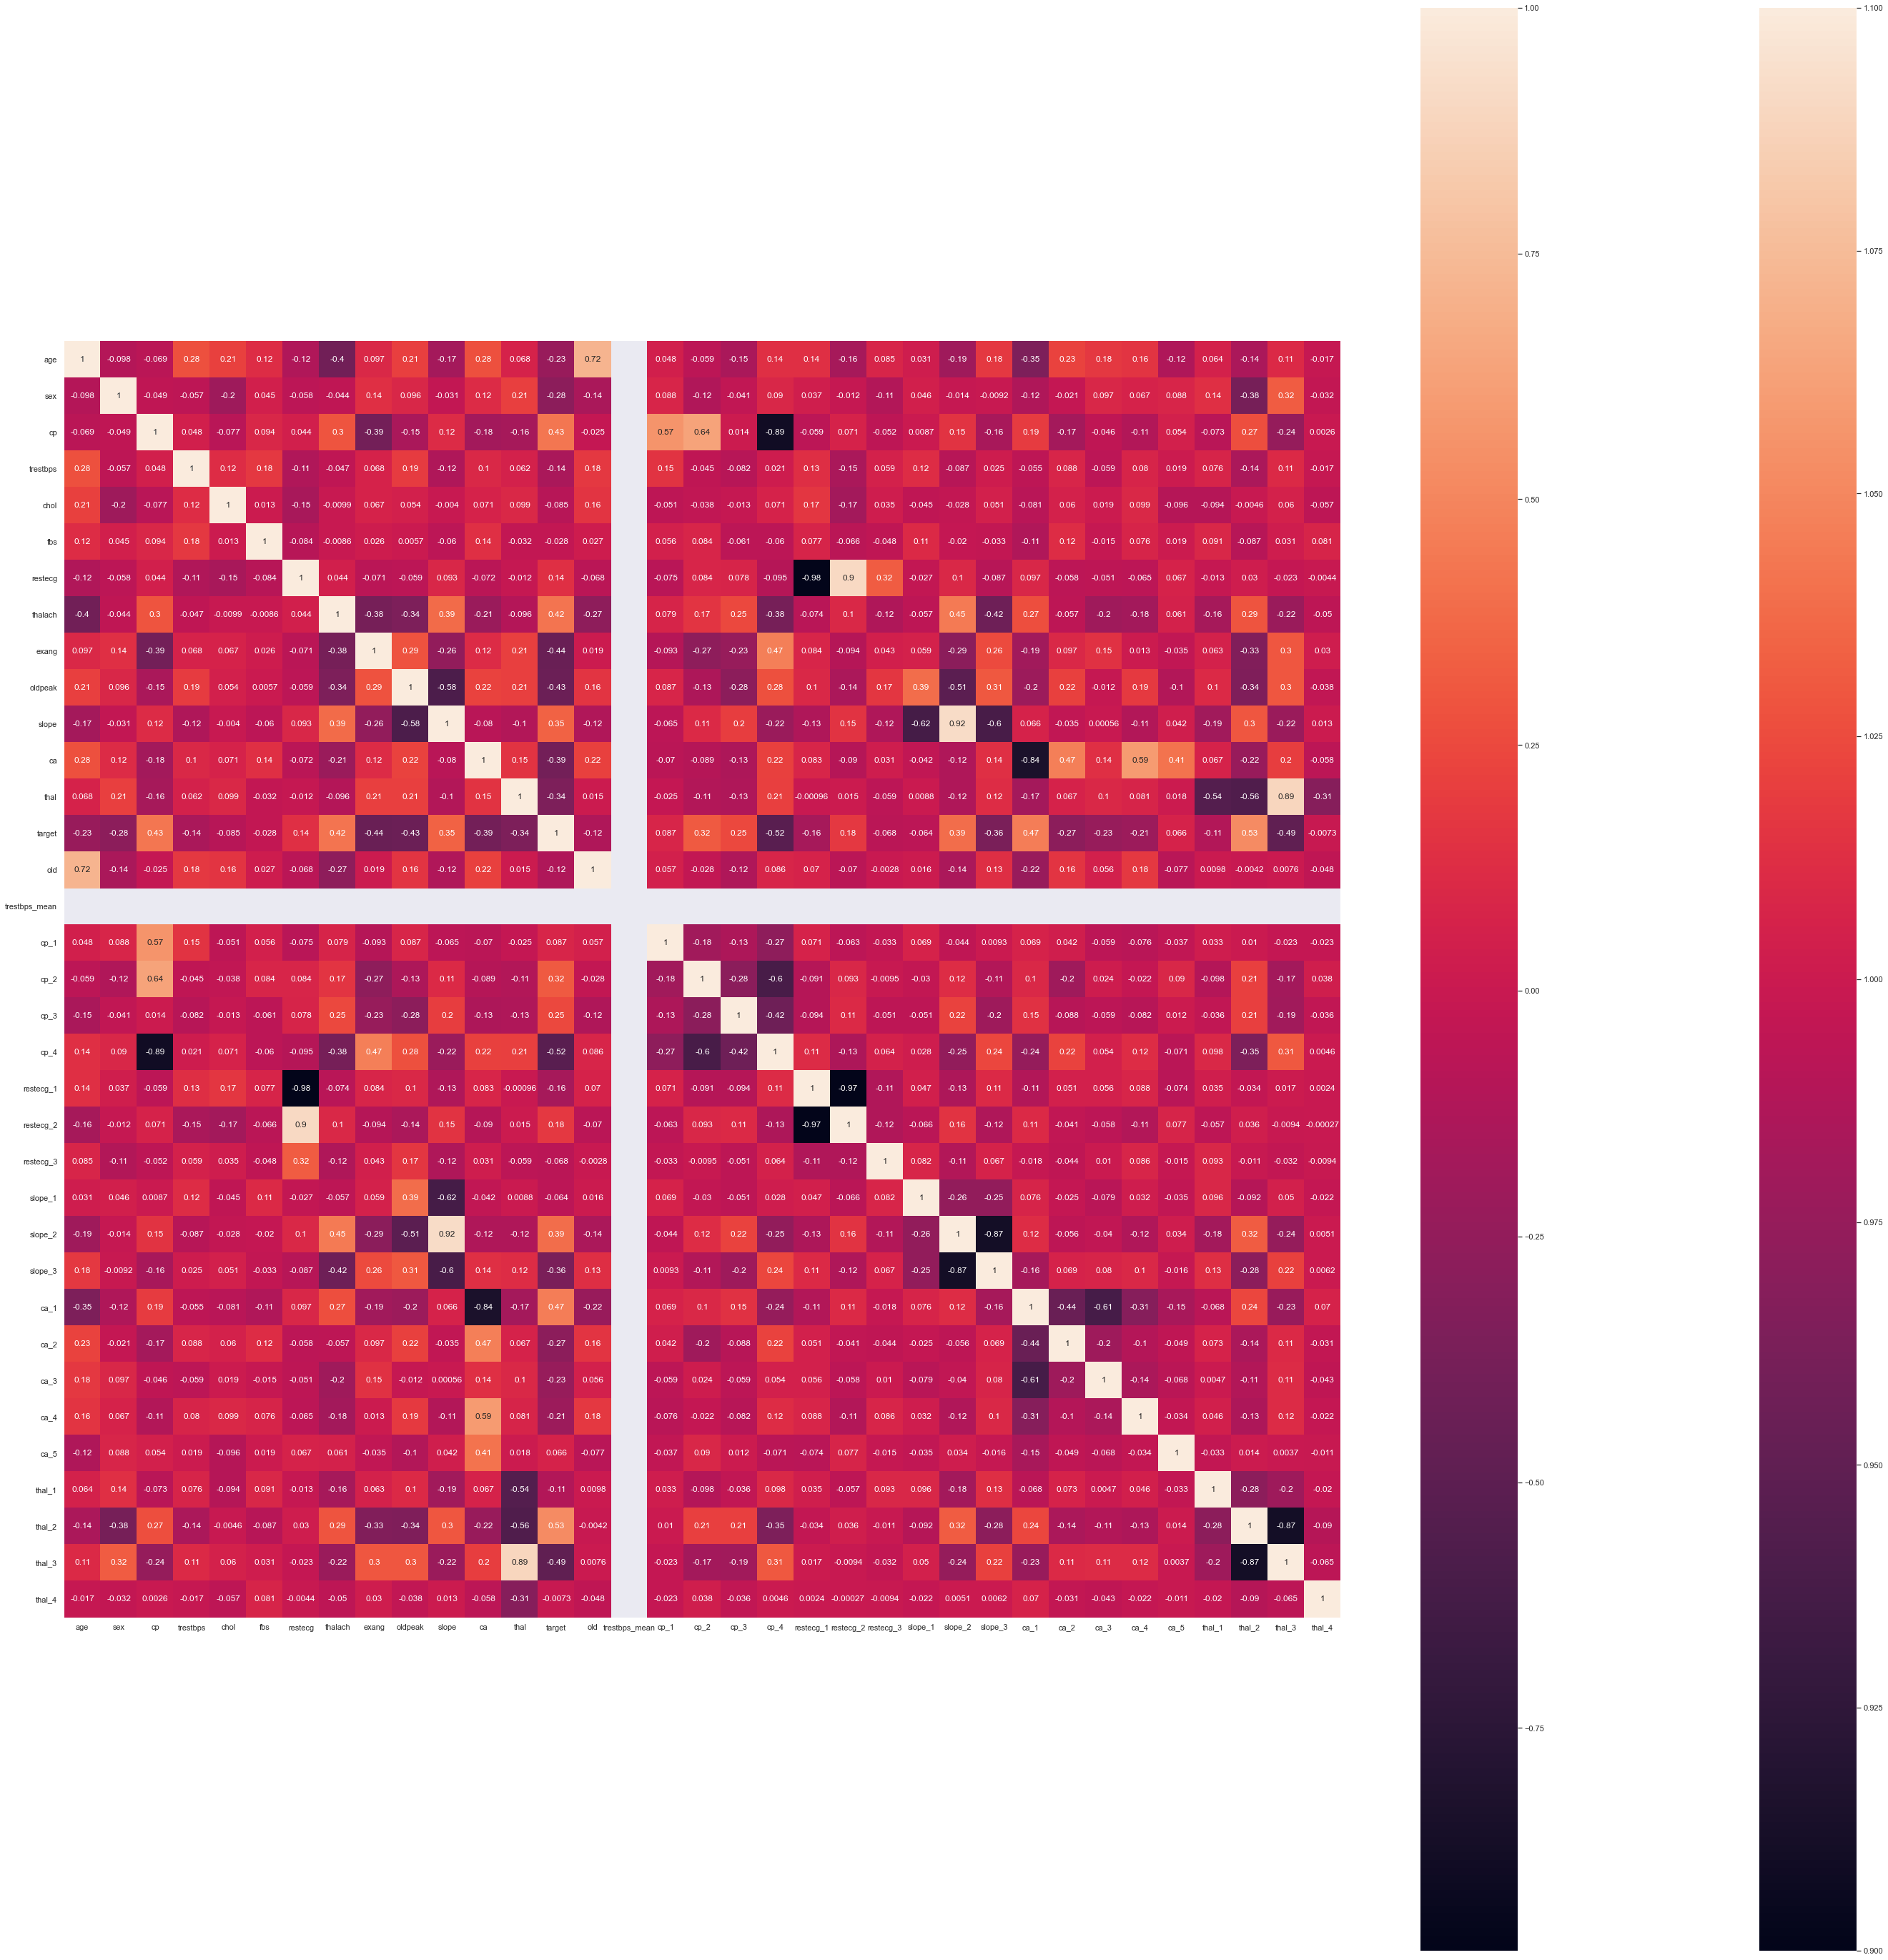

In [183]:
# sns.set(rc = {'figure.figsize':(30,30)})
corr = df_r.corr().abs()
highcorr = corr[corr>=.65]
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(highcorr, annot=True, linewidths=0.3, ax=ax  , linecolor='grey')
sns.heatmap(heart.corr(), annot=True, square=True)

In [179]:
def heat_corr():
    new = df_r['age', 'sex'].copy()
    sns.heatmap(new.corr(), square=True)
    return hear_corr
aaa = heat_corr

NameError: name 'aaaa' is not defined

In [ ]:
new= 
sns.heatmap(new.corr(), square=True)